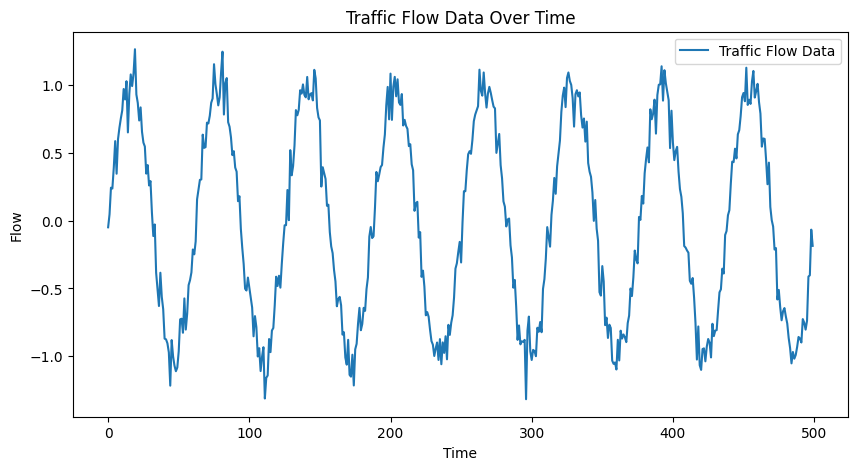

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2506 - mae: 0.4354 - val_loss: 0.2127 - val_mae: 0.4016
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1613 - mae: 0.3365 - val_loss: 0.1098 - val_mae: 0.2771
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0720 - mae: 0.2151 - val_loss: 0.0353 - val_mae: 0.1632
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0414 - mae: 0.1815 - val_loss: 0.0261 - val_mae: 0.1376
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0280 - mae: 0.1421 - val_loss: 0.0197 - val_mae: 0.1201
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0224 - mae: 0.1319 - val_loss: 0.0146 - val_mae: 0.1013
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - mae: 0.1027 - val_loss: 0.0095 - val_mae: 0.0818
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0102 - mae: 0.0856 - val_loss: 0.0050 - val_mae: 0.0565
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - mae: 0.

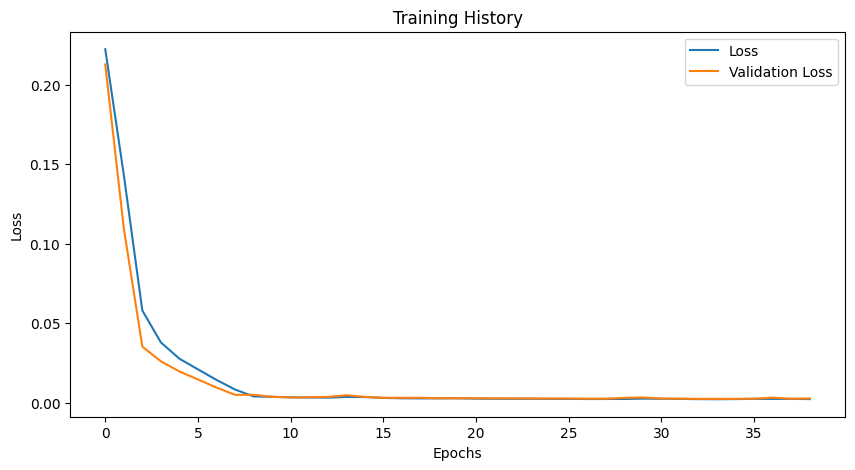

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


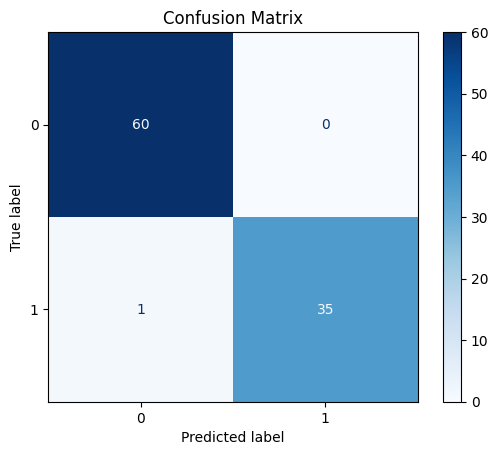

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.97      0.99        36

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



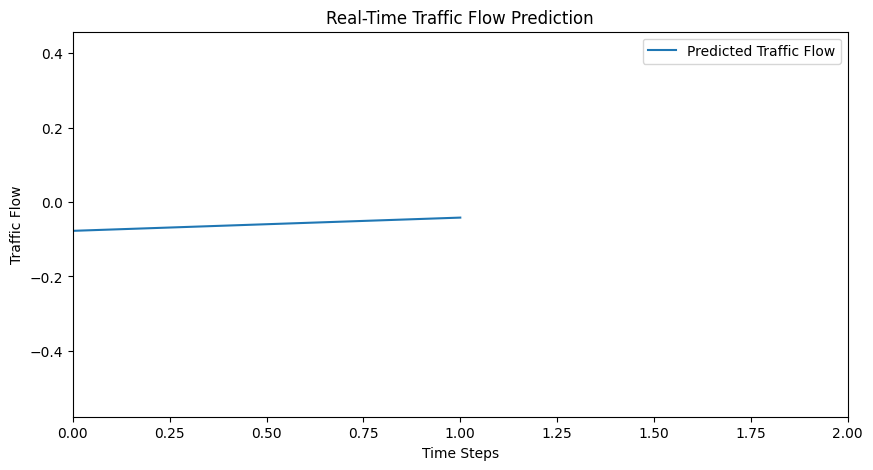

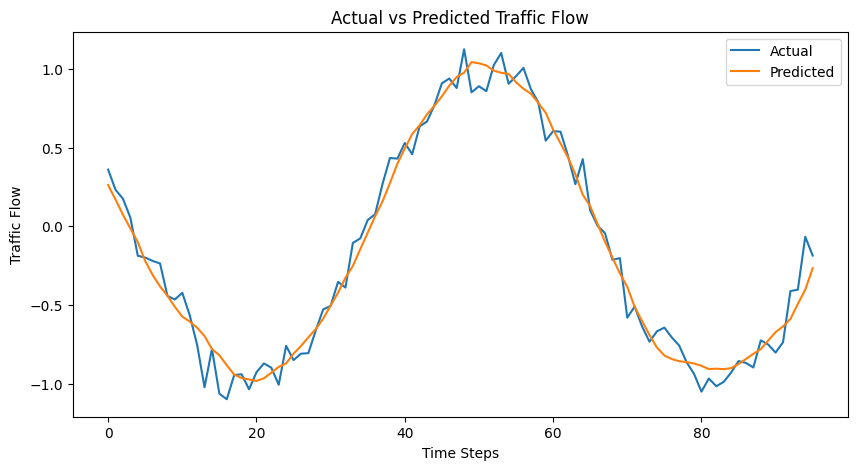

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import os
import matplotlib.animation as animation

# Simulate or load data
def load_data():
    # Simulating traffic flow data (replace with actual data)
    time_steps = 500
    data = np.sin(np.linspace(0, 50, time_steps)) + np.random.normal(0, 0.1, time_steps)
    return data

# Image Loading & Exploration (Replace with your image dataset)
def load_and_explore_images(image_folder_path):
    images = []
    for img_name in os.listdir(image_folder_path):
        if img_name.endswith('.jpg') or img_name.endswith('.png'):
            img = Image.open(os.path.join(image_folder_path, img_name))
            img = img.resize((100, 100))  # Resizing for uniformity
            images.append(np.array(img))

    # Display the first image
    plt.figure(figsize=(6, 6))
    plt.imshow(images[0])
    plt.title("Example Traffic Flow Image")
    plt.axis('off')
    plt.show()

    return np.array(images)

# Data Preprocessing
def preprocess_data(data, window_size):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X = np.array(X)
    y = np.array(y)
    return X, y, scaler

# Visualizing Data (if images are available, replace this with image dataset exploration)
def visualize_traffic_data(data):
    plt.figure(figsize=(10, 5))
    plt.plot(data, label="Traffic Flow Data")
    plt.title("Traffic Flow Data Over Time")
    plt.xlabel("Time")
    plt.ylabel("Flow")
    plt.legend()
    plt.show()

# Training and Evaluating LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Confusion Matrix Analysis
def confusion_matrix_analysis(y_true, y_pred, threshold=0.5):
    y_pred_binary = (y_pred > threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    print(classification_report(y_true, y_pred_binary))

# Real-Time Visualization Update Function
def update_plot(i, data, ax, line):
    # Simulating live data (update with actual live data)
    new_data_point = np.sin(i / 10) + np.random.normal(0, 0.1)  # Replace with live data fetch
    data.append(new_data_point)
    if len(data) > 50:
        data.pop(0)

    line.set_data(range(len(data)), data)
    ax.set_xlim(0, len(data))
    ax.set_ylim(min(data) - 0.5, max(data) + 0.5)
    return line,

# Main Execution
data = load_data()
visualize_traffic_data(data)

# Parameters
window_size = 20
X, y, scaler = preprocess_data(data, window_size)

# Train-Test Split
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Build and Train Model
model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

# Visualize Training History
plot_training_history(history)

# Predictions and Confusion Matrix
y_pred = model.predict(X_test)
y_test_binary = (y_test > 0.5).astype(int)  # Convert to binary for confusion matrix
confusion_matrix_analysis(y_test_binary, y_pred)

# Real-Time Traffic Flow Prediction Visualization
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Real-Time Traffic Flow Prediction")
ax.set_xlabel("Time Steps")
ax.set_ylabel("Traffic Flow")
line, = ax.plot([], [], label='Predicted Traffic Flow')
ax.legend()

# Animate the real-time data
ani = animation.FuncAnimation(fig, update_plot, fargs=([], ax, line), frames=100, interval=200, blit=True)
plt.show()

# Visualize Predictions vs. Actual
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(y_test), label="Actual")
plt.plot(scaler.inverse_transform(y_pred), label="Predicted")
plt.title("Actual vs Predicted Traffic Flow")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Flow")
plt.legend()
plt.show()

